# Initial exploration of the data

In [251]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(1547)
import seaborn as sns

 Volume in drive C is Windows
 Volume Serial Number is 361D-A6A7

 Directory of C:\Users\Don\Desktop\github\exoplanets\data\processed

03/29/2018  01:26 PM    <DIR>          .
03/29/2018  01:26 PM    <DIR>          ..
03/25/2018  02:34 PM                 0 .gitkeep
03/29/2018  01:24 PM           585,229 Cleaned.csv
               2 File(s)        585,229 bytes
               2 Dir(s)  17,973,334,016 bytes free


In [388]:
import math
df=pd.read_csv('Cleaned.csv')


In [397]:
#used to calulat explosive force
def comparable(x):
  if x <= 0.0005:
    return 'Large city block'
  elif x > 0.0006 and x <= 0.004:
    return 'Multiple city blocks'
  elif x > 0.005 and x <= 0.009:
    return 'Levels half large city'
  elif x >0.01 and x <= 0.02:
    return 'Levels most large city'
  elif x > 0.02 and x<= 50:
    return 'Entirety of Paris destroyed'
  elif x > 50 and x <= 200:
    return 'Mount Krakatoa comparable'
  elif x > 200 and x<= 1000:
    return 'Minor extiction event'
  elif x>1000 and x<=5000:
    return 'Continent exterminated'
  elif x> 5000:
    return 'Major extinction event'
# setting new df to existing dataframe
df['Damage']=df['Megatons(TNT)'].map(lambda x:comparable(x))
df
# we only need the year for this part of the analysis due to the closeness in time it would produce alot of noise
# df["Close-Approach (CA) Date"]=df["Close-Approach (CA) Date"].map(lambda x:x.split('-', 1)[0])
#turn the date into an into for easir time later
df["Close-Approach (CA) Date"]=df["Close-Approach (CA) Date"].map(lambda x:int(x))
df

,Object,Close-Approach (CA) Date,CA Distance Minimum (au),V relative (m/s),Estimated Diameter(meters),Mass(Kg),Force(joules),Megatons(TNT),Damage
0,(2016 SR2),2018,0.04791,7270.0,19,6.464455e+07,2.349829e+11,17873.637471,Major extinction event
1,(2018 FU1),2018,0.03129,5900.0,14,2.586159e+07,7.629169e+10,55051.865476,Major extinction event
2,(2018 FO4),2018,0.01970,6270.0,7984,4.796591e+15,1.503731e+19,0.000279,Large city block
3,(2018 FU3),2018,0.04484,8410.0,19,6.464455e+07,2.718303e+11,15450.813842,Major extinction event
4,(2018 FE4),2018,0.03360,20670.0,34,3.704315e+08,3.828409e+12,1097.061390,Continent exterminated
5,(2018 FB),2018,0.01250,8480.0,52,1.325199e+09,5.618845e+12,747.484645,Minor extiction event
6,(2018 FB2),2018,0.02556,6700.0,24,1.302881e+08,4.364652e+11,9622.759481,Major extinction event
7,(2010 GD35),2018,0.03966,11600.0,42,6.982629e+08,4.049925e+12,1037.056214,Continent exterminated
8,(2018 EM4),2018,0.01596,6190.0,29,2.298609e+08,7.114195e+11,5903.689607,Major extinction event
9,(2004 FG29),2018,0.00997,14920.0,21,8.728287e+07,6.511302e+11,6450.322834,Major extinction event


## Initial part of the data exploration, just the base decriptive stats

In [254]:
df['CA Distance Minimum (au)'].describe() # Median and mean are pretty close

count    6573.000000
mean        0.027733
std         0.013611
min         0.000000
25%         0.016890
50%         0.028940
75%         0.039340
max         0.049990
Name: CA Distance Minimum (au), dtype: float64

In [255]:
df['V relative (m/s)'].describe() #ok so the mean and the median are pretty close

count     6573.000000
mean     11027.130686
std       6007.204384
min        450.000000
25%       6620.000000
50%       9640.000000
75%      14330.000000
max      41970.000000
Name: V relative (m/s), dtype: float64

In [256]:
df['Close-Approach (CA) Date'].describe() #No repeats and must section off by groups

count                6573
unique               6573
top       2054-7-25 06:45
freq                    1
Name: Close-Approach (CA) Date, dtype: object

In [267]:
df['Estimated Diameter(meters)'].describe()# huuuuuge standard deviation and mean and media are skewed

count    6573.000000
mean      744.757797
std      1878.117916
min        13.000000
25%        39.000000
50%       130.000000
75%       320.000000
max      8987.000000
Name: Estimated Diameter(meters), dtype: float64

In [258]:
df['Mass(Kg)'].describe() # becuase of the massive scales of how this works( and for te sake of NOT doing densities)

count    6.573000e+03
mean     2.772881e+14
std      1.088642e+15
min      2.070624e+07
25%      5.590684e+08
50%      2.070624e+10
75%      3.088311e+11
max      6.840933e+15
Name: Mass(Kg), dtype: float64

In [259]:
df['Force(joules)'].describe() # mean and media are close enough but 

count    6.573000e+03
mean     1.034649e+18
std      4.495060e+18
min      1.836173e+10
25%      2.139354e+12
50%      1.187730e+14
75%      2.290302e+15
max      6.016003e+19
Name: Force(joules), dtype: float64

In [301]:
df['Megatons(TNT)'].describe()

count      6573.000000
mean       5115.472350
std       15423.232019
min           0.000070
25%           1.833819
50%          35.361579
75%        1963.209666
max      228736.624162
Name: Megatons(TNT), dtype: float64

In [307]:
df['Damage'].describe()

count                            6522
unique                              9
top       Entirety of Paris destroyed
freq                             2804
Name: Damage, dtype: object

## Visializations

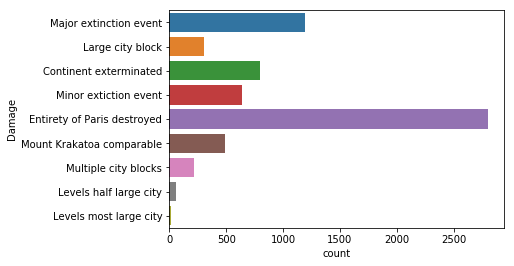

In [319]:
sns.countplot(y='Damage', data=df,orient='h')

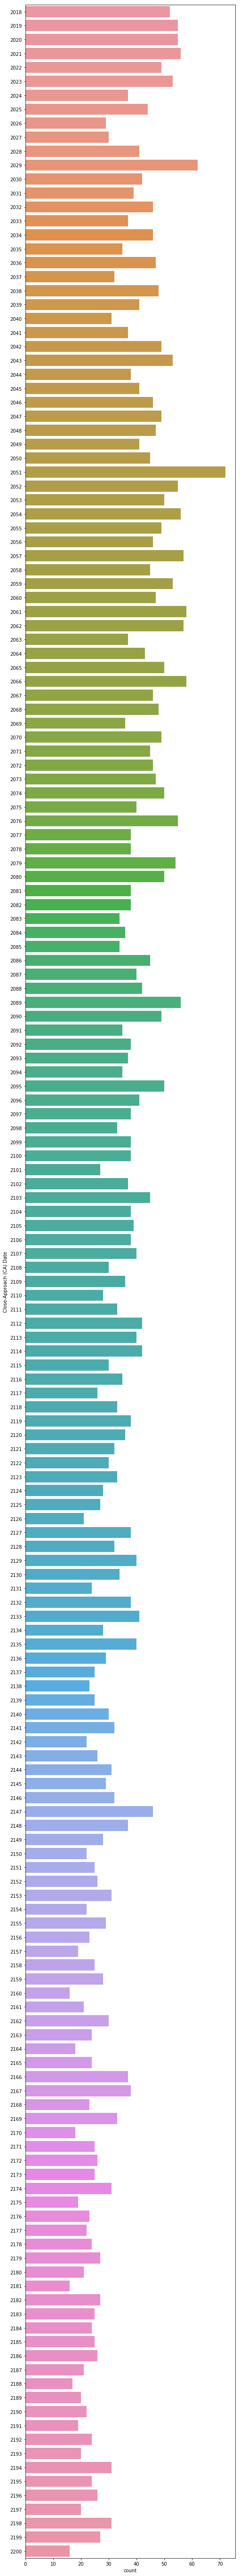

In [391]:
plt.figure(figsize=(8,100))
sns.countplot(y='Close-Approach (CA) Date', data=df,orient='h')

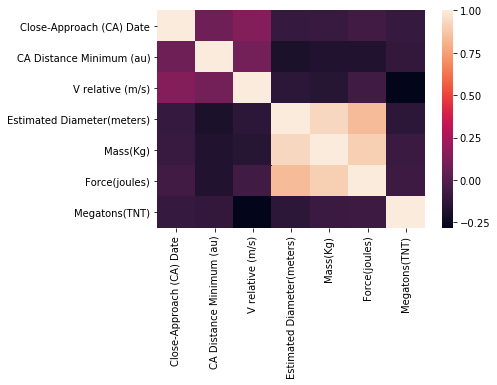

In [395]:
sns.heatmap(df.corr()) 

In [261]:
# as expected( and due to the heavy amount of math in calculating the features) there is a direct correclaton between force/ 
# velocity and mass

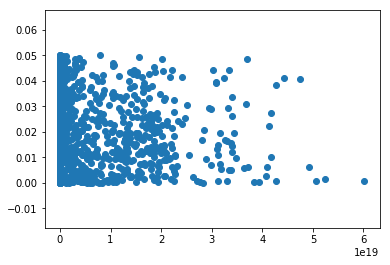

In [282]:
plt.scatter(df['Force(joules)'], df['CA Distance Minimum (au)'])
#based on these it loos like theres no correlation between the distance and the amount of force, which makes sense given the
#spread of astreroids

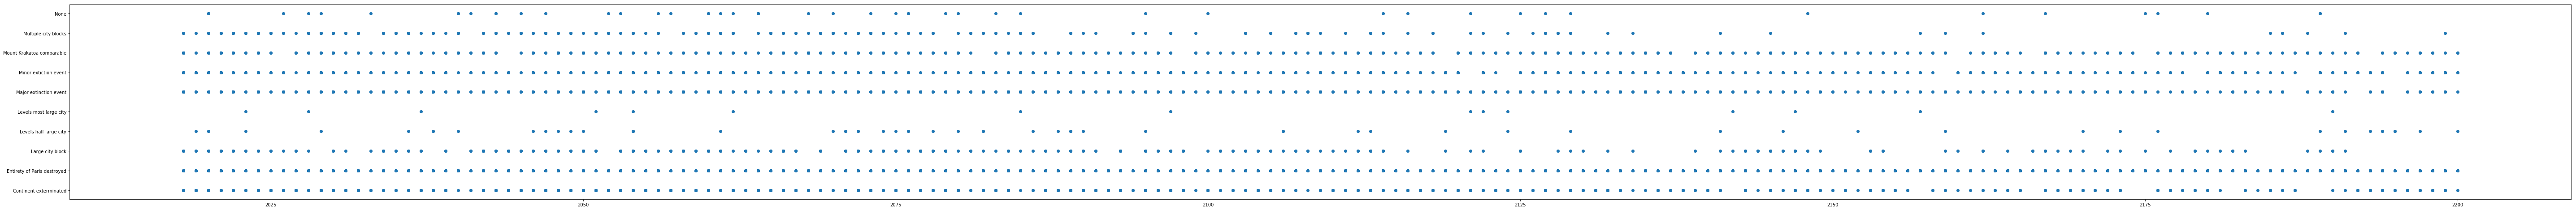

In [399]:
plt.figure(figsize=(100,8))
plt.scatter(df['Close-Approach (CA) Date'], df['Damage'])

Object                         object
Close-Approach (CA) Date        int64
CA Distance Minimum (au)      float64
V relative (m/s)              float64
Estimated Diameter(meters)      int64
Mass(Kg)                      float64
Force(joules)                 float64
Megatons(TNT)                 float64
Damage                         object
dtype: object